In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import glob
import os, os.path
import json 
import math 
import statistics
import utm
import matplotlib.patches as  mpatches
import matplotlib.lines as mlines
import numpy as np
import pandas as pd 
from pandas.io.json import json_normalize
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import cv2
import rasterio as rs
from rasterio.plot import show, show_hist
from rasterio.mask import mask
from rasterio.coords import BoundingBox
from rasterio import windows
from rasterio import warp
from rasterio.merge import merge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from scipy.stats import pearsonr

In [2]:
import sys
sys.path.append('../')
from src import utils 
from src.configs import blocks_information

In [3]:
label_dir = '/data2/hkaman/Livingston/data/10m/labels/*.npy'
label_names = sorted(glob.glob(label_dir))

In [4]:
len(label_names)

206

In [5]:
class hist_dist_plot():
    def __init__(self, label_dir):
        self.label_dir = label_dir
    

    def _return_pair_dict(self,):

        label_names = sorted(glob.glob(self.label_dir))
        pair_dict = {}
        all_label_mtx = []

        for name in label_names:

            block_name = name[-22:-10]
            # print(block_name[:-5])
            mtx = np.load(name, allow_pickle=True)
            mtx = mtx.flatten()
            mtx[mtx < 0]  = -1

            res = {key: blocks_information[key] for key in blocks_information.keys() & {block_name[:-5]}}
            list_d = res.get(block_name[:-5])

            block_variety = list_d[0]

            all_label_mtx.append(mtx)


            _d = {'label' : mtx, 
                  'block' : block_name,
                  'cultivar': block_variety}
            pair_dict[block_name] = _d

        all_label_mtx = np.concatenate(all_label_mtx)
        all_label_mtx = all_label_mtx[all_label_mtx >= 0]
        all_label_mtx = all_label_mtx * 2.2417

        return pair_dict, all_label_mtx
    



    def _plot_hist_dsit(self):

        pair_dict, all_label_mtx = self._return_pair_dict()


        # calculating the count for historgram plot: 
        df = pd.DataFrame()
        df['ytrue'] = all_label_mtx

        counts = []
        for i in range(1, 70):
            if i == 1:
                Data  = df.loc[(df['ytrue'] < (i+1))]
            elif i == 68: 
                Data  = df.loc[(df['ytrue'] >= (i))]
            else: 
                Data  = df.loc[(df['ytrue'] >= i) & (df['ytrue'] < (i+1))] 
            counts.append(len(Data))

        #print(f"{all_label_mtx.min()} |{all_label_mtx.mean()} | {all_label_mtx.max()}")

        fig, axs = plt.subplots(1, 1 , figsize = (10, 5))
        sns.set_style("whitegrid", {'axes.grid' : False})
        #plt.rcParams["figure.autolayout"] = True
        plt.subplots_adjust(hspace = 0.1)

        bins_value  = np.arange(1, 70, 1)
        sns.barplot(x = bins_value, y= counts, color = 'blue', ax = axs,) #
        for bar in (axs.patches):
            bar.set_width(1)
        

        axs.axvline(x = 14.5, linestyle = '--', color = 'g', label = 'Lower Control Point of Extreme Values')
        axs.axvline(x = 26.5, color = 'k', label = 'Mean Value')
        axs.axvline(x = 44.5, linestyle = '--', color = 'g', label = 'Upper Control Point of Extreme values')



        axs01 = axs.twinx()
        for k, v in pair_dict.items():
            label_mtx = v['label']
            label_mtx = label_mtx[label_mtx >= 0]
            label_mtx = label_mtx * 2.2417

            if (label_mtx.mean() < 12) or (label_mtx.mean() > 50):
                print(v['block'])
                
                ax = sns.kdeplot(label_mtx, ax = axs01, color ='red', shade ='fill', alpha=.1, legend=True,)
            else: 
                ax = sns.kdeplot(label_mtx, ax = axs01, color ='grey', alpha=.2, legend=True,)

        handles = [mpatches.Patch(facecolor = 'blue', label = 'Pixel Count Per Bin'),
        mpatches.Patch(facecolor = 'grey', label = 'Distribution of Blocks'),
        mpatches.Patch(facecolor = 'red', label = 'Distribution of Blocks within EVR'),
        mlines.Line2D([], [], linestyle='--', linewidth=2, color='green', label = 'CPs of Extreme values'),
        mlines.Line2D([], [], linewidth=2, color='k', label = 'Mean Value'),
        ] 
        
        axs.legend(handles = handles, loc = 'upper right', fontsize=10)
        axs.set_ylabel('Number of Pixels', fontsize=13)
        axs01.set_ylabel(ylabel='Density', fontsize=13)
        axs.set_xlabel('Yield Value (t/ha)', fontsize=13)
        axs.set_xlim(- 1, 70)

        axs.set_xticklabels(bins_value)
        plt.xticks(np.arange(0, 70, 5), fontsize=10)


        fig.tight_layout()

LIV_004_2019
LIV_007_2017
LIV_007_2018
LIV_016_2019
LIV_021_2017
LIV_021_2018
LIV_063_2016
LIV_077_2019
LIV_105_2019
LIV_181_2017
LIV_181_2018


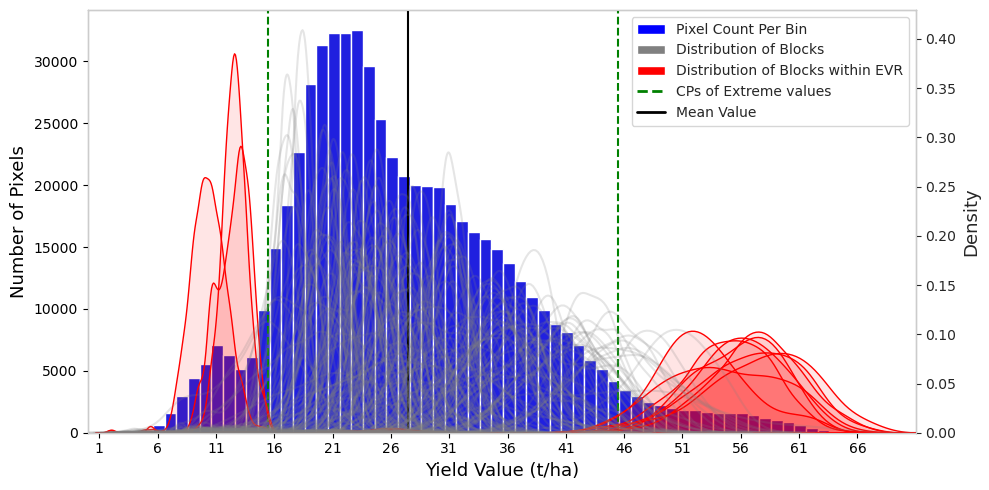

In [6]:
_ = hist_dist_plot(label_dir)._plot_hist_dsit()

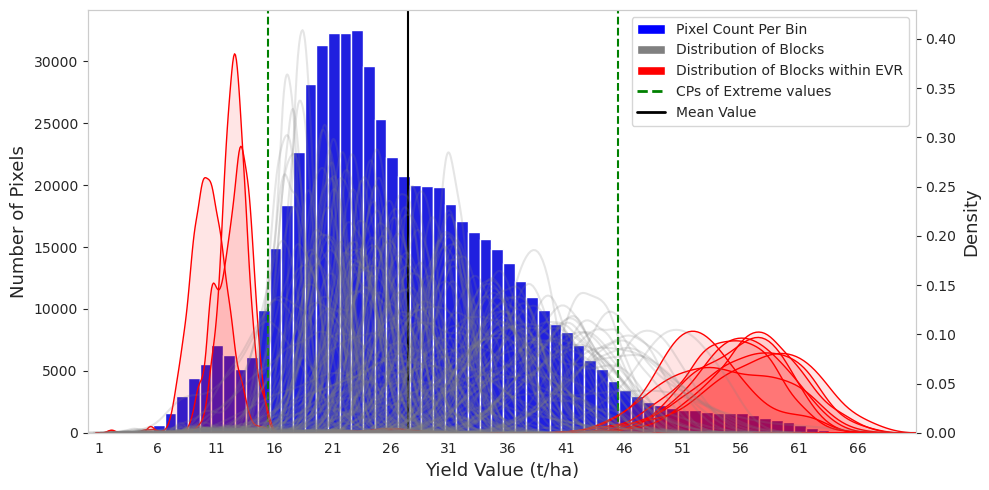

In [57]:
_ = hist_dist_plot(label_dir)._plot_hist_dsit()